In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
csvpath_strat =  os.path.join(os.getcwd(),'position.csv')
csvpath_end =  os.path.join(os.getcwd(),'end_position.csv')

In [3]:
ball_start_pos = pd.read_csv (csvpath_strat, sep=';',header =[0])
ball_end_pos = pd.read_csv (csvpath_end, sep=';',header =[0])

In [5]:
ball_start_pos

,X,Y,W
0,350,350,1.0
1,350,700,2.0
2,350,1050,1.5
3,700,350,2.0
4,700,700,1.0
5,700,1050,1.0
6,1050,350,1.5
7,1050,700,2.0
8,1050,1050,1.5


In [6]:
ball_end_pos

,size,X,Y,Z
0,s,3750,200,525
1,s,3750,600,525
2,s,3750,1000,525
3,m,3500,200,550
4,m,3500,600,550
5,m,3500,1000,550
6,l,3250,200,575
7,l,3250,600,575
8,l,3250,1000,575


In [7]:
end_pos_s = ball_end_pos.loc[ball_end_pos['size']=='s'].reset_index(drop=True)
end_pos_m = ball_end_pos.loc[ball_end_pos['size']=='m'].reset_index(drop=True)
end_pos_l = ball_end_pos.loc[ball_end_pos['size']=='l'].reset_index(drop=True)

In [8]:
s_ball_cnter = 0
m_ball_cnter = 0
l_ball_cnter = 0

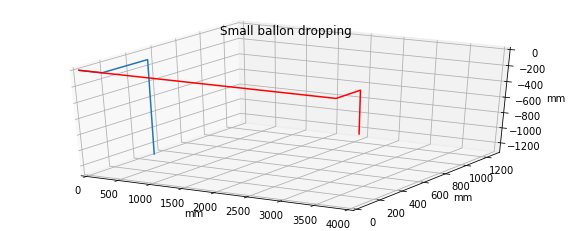

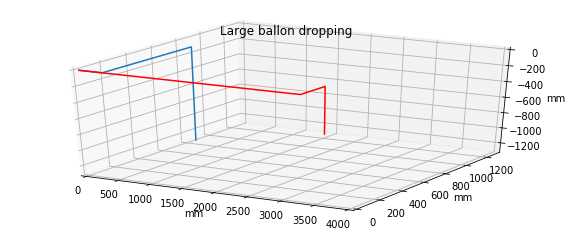

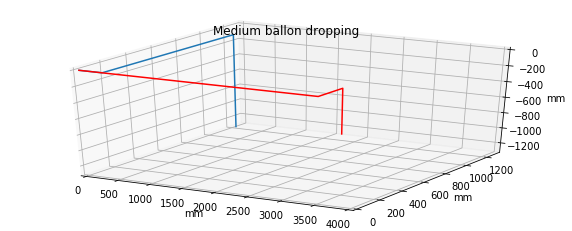

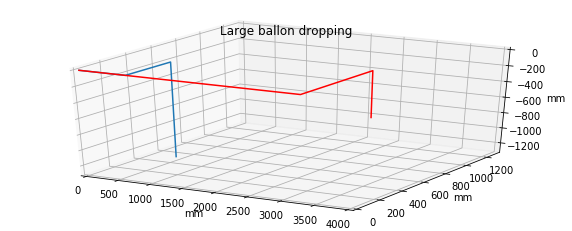

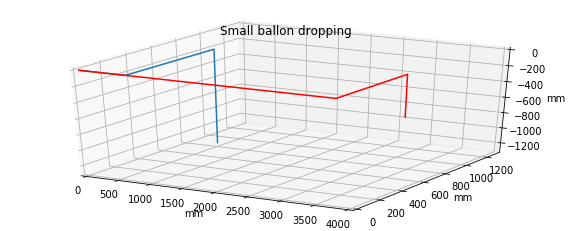

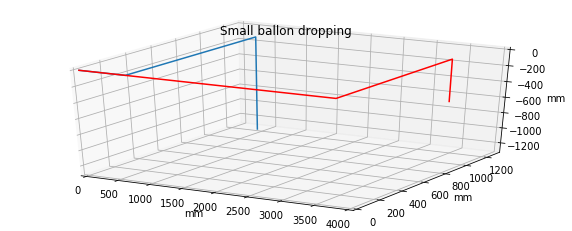

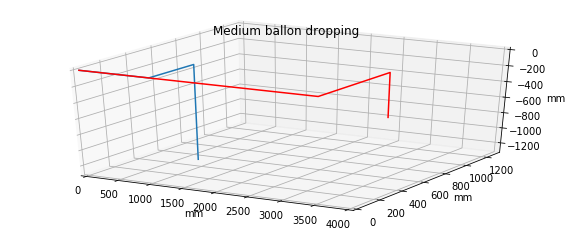

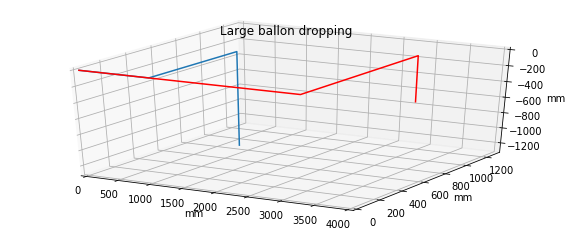

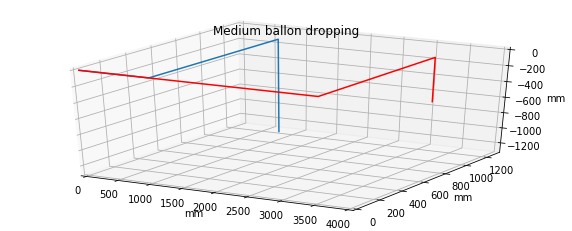

In [9]:
for cnter in range(9):
    x_start = ball_start_pos['X'][cnter]
    y_start = ball_start_pos['Y'][cnter]
    z_start = 1200
    x_getball = np.array([0,x_start,x_start,x_start])
    y_getball = np.array([0,0,y_start,y_start])
    z_getball = np.array([0,0,0,-z_start])
    weight = ball_start_pos['W'][cnter]
    fig = plt.figure(figsize=[10, 4])
    ax = plt.axes(projection='3d')
    ax.set(xlim=(0, 4000), ylim=(0, 1300),zlim=(-1300,0))
    ax.plot(x_getball, y_getball,z_getball)
    ax.set_xlabel('mm')
    ax.set_ylabel('mm')
    ax.set_zlabel('mm')
    plt.title(f'Ballon picking: {cnter+1}')
    plt.savefig(f'{cnter+1}_Ballon picking')
    #plt.pause(1)
    if weight == 1:
        x_end = end_pos_s['X'][s_ball_cnter]
        y_end = end_pos_s['Y'][s_ball_cnter]
        z_end = end_pos_s['Z'][s_ball_cnter]
        s_ball_cnter = s_ball_cnter+1
        title = 'Small'
        
    elif weight == 1.5:
        x_end = end_pos_m['X'][m_ball_cnter]
        y_end = end_pos_m['Y'][m_ball_cnter]
        z_end = end_pos_m['Z'][m_ball_cnter]
        m_ball_cnter = m_ball_cnter+1
        title = 'Medium'
    elif weight == 2:
        x_end = end_pos_l['X'][l_ball_cnter]
        y_end = end_pos_l['Y'][l_ball_cnter]
        z_end = end_pos_l['Z'][l_ball_cnter]
        l_ball_cnter = l_ball_cnter+1
        title = 'Large'
    x_putball = np.array([0,x_end,x_end,x_end])
    y_putball = np.array([0,0,y_end,y_end])
    z_putball = np.array([0,0,0,-z_end])
    ax.plot(x_putball, y_putball,z_putball,'red')
    plt.title(f'{title} ballon dropping')
    plt.draw()
    plt.savefig(f'{cnter+1}_{title} ballon dropping')
    plt.pause(1)